## 数据挖掘 - 关联图绘制示例

In [1]:
import pandas as pd
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import OnehotTransactions

In [2]:
%matplotlib inline

### 从 csv 文件读入原始数据

In [3]:
# csv 文件来自 https://github.com/asaini/Apriori.git
dataset = []
with open('INTEGRATED-DATASET.csv', 'rU') as f:
    for line in f:
        dataset.append(line.strip().rstrip(',').split(','))

In [4]:
dataset[:10]

[['LBE', 'Brooklyn', '11204'],
 ['MBE', 'WBE', 'BLACK', 'Cambria Heights', '11411'],
 ['MBE', 'BLACK', 'Yorktown Heights', '10598'],
 ['MBE', 'BLACK', 'Long Beach', '11561'],
 ['MBE', 'ASIAN', 'Brooklyn', '11235'],
 ['MBE', 'WBE', 'ASIAN', 'New York', '10010'],
 ['MBE', 'ASIAN', 'New York', '10026'],
 ['MBE', 'BLACK', 'New York', '10026'],
 ['MBE', 'HISPANIC', 'New York', '10034'],
 ['MBE', 'WBE', 'BLACK', 'Staten Island', '10303']]

### 将原始数据转换成矩阵

In [5]:
oht = OnehotTransactions()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)

In [6]:
df

,10001,10002,10003,10004,10005,10006,10007,10009,10010,10011,...,Whitestone,Williston Park,Wood Ridge,Woodbridge,Woodbury,Woodcliff Lake,Woodhaven,Woodside,Yonkers,Yorktown Heights
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 计算先验值与置信度

In [7]:
ap = apriori(df, min_support=0.1)

In [8]:
ap

,support,itemsets
0,0.202113,[422]
1,0.300704,[433]
2,0.152113,[457]
3,0.164085,[519]
4,0.671127,[568]
5,0.300000,[601]
6,0.295070,[607]
7,0.477465,[693]
8,0.200000,"[422, 568]"
9,0.300704,"[433, 568]"


In [9]:
cf = association_rules(ap, min_threshold=0.5)

In [10]:
cf

,antecedants,consequents,support,confidence,lift
0,(607),(693),0.295070,0.594272,1.244641
1,(519),(568),0.164085,1.000000,1.490031
2,(433),(568),0.300704,1.000000,1.490031
3,(422),(568),0.202113,0.989547,1.474456
4,(601),(693),0.300000,1.000000,2.094395
5,(693),(601),0.477465,0.628319,2.094395
6,"(601, 607)",(693),0.118310,1.000000,2.094395
7,"(693, 607)",(601),0.175352,0.674699,2.248996
8,(607),(568),0.295070,0.577566,0.860591
9,(457),(568),0.152113,0.740741,1.103727


### 导出单边向量及节点标签

In [11]:
rows = cf.values
eds = []
lbls = {}
for row in rows:
    if len(row[0]) == 1 and len(row[1]) == 1:
        a = tuple(row[0])[0]
        b = tuple(row[1])[0]
        eds.append((a, b,row[2]))
        lbls[a] = oht.columns_[a]
        lbls[b] = oht.columns_[b]

In [12]:
eds, lbls

([(607, 693, 0.29507042253521126),
  (519, 568, 0.16408450704225352),
  (433, 568, 0.30070422535211266),
  (422, 568, 0.20211267605633804),
  (601, 693, 0.3),
  (693, 601, 0.47746478873239434),
  (607, 568, 0.29507042253521126),
  (457, 568, 0.15211267605633802)],
 {422: 'ASIAN',
  433: 'BLACK',
  457: 'Brooklyn',
  519: 'HISPANIC',
  568: 'MBE',
  601: 'NON-MINORITY',
  607: 'New York',
  693: 'WBE'})

### 绘制有向图

In [13]:
DG = nx.DiGraph()
DG.add_weighted_edges_from(eds)

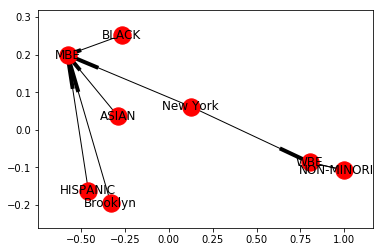

In [14]:
nx.draw_networkx(DG, labels=lbls)